# Introduction to Pytorch

## `autodiff`

### Autodiff for simple gradient descent

Load needed libraries

$$
\newcommand\p[1]{{\left(#1\right)}}
\newcommand\code[1]{\texttt{#1}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

Here is a simple example of how to find the minimum of the function
$x\mapsto\p{x-3}^2$ using the autodiff functionality of Pytorch.

First initialize a tensor `x` and indicate that we want to store a
gradient on it.

In [2]:
x = torch.tensor([1.0], requires_grad=True)

Create an optimizer on parameters. Here we want to optimize w.r.t.
variable `x`:

In [3]:
optimizer = optim.SGD([x], lr=0.01)

Create a computational graph using parameters (here only `x`) and
potentially other tensors.

Here we only want to compute $\p{x-3}^2$ so we define:

In [4]:
y = (x - 3) ** 2

Back-propagating gradients for `y` down to `x`. Don’t forget to reset
gradients before.

In [5]:
optimizer.zero_grad()
y.backward()

Use gradient on `x` to apply a one-step gradient descent.

In [23]:
optimizer.step()
x.grad
x

tensor([1.5200], requires_grad=True)

And last we iterate the whole process

In [24]:
it = 0
while it < 1000:
    loss = (x - 3) ** 2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if it % 20 == 0:
        print("Iteration: %d, x: %f, loss: %f" % (it, x.item(), loss.item()))
    it += 1

Iteration: 0, x: 1.549600, loss: 2.190402
Iteration: 20, x: 2.031701, loss: 0.976263
Iteration: 40, x: 2.353556, loss: 0.435120
Iteration: 60, x: 2.568429, loss: 0.193933
Iteration: 80, x: 2.711880, loss: 0.086436
Iteration: 100, x: 2.807649, loss: 0.038525
Iteration: 120, x: 2.871585, loss: 0.017170
Iteration: 140, x: 2.914269, loss: 0.007653
Iteration: 160, x: 2.942765, loss: 0.003411
Iteration: 180, x: 2.961789, loss: 0.001520
Iteration: 200, x: 2.974490, loss: 0.000678
Iteration: 220, x: 2.982970, loss: 0.000302
Iteration: 240, x: 2.988630, loss: 0.000135
Iteration: 260, x: 2.992409, loss: 0.000060
Iteration: 280, x: 2.994933, loss: 0.000027
Iteration: 300, x: 2.996617, loss: 0.000012
Iteration: 320, x: 2.997741, loss: 0.000005
Iteration: 340, x: 2.998492, loss: 0.000002
Iteration: 360, x: 2.998993, loss: 0.000001
Iteration: 380, x: 2.999328, loss: 0.000000
Iteration: 400, x: 2.999551, loss: 0.000000
Iteration: 420, x: 2.999700, loss: 0.000000
Iteration: 440, x: 2.999800, loss: 0.0

### Differentiate the exponential

The exponential function can be approximated using its Taylor expansion:
$$
\exp\p{z}\approx\sum_{k=0}^{N}\frac{z^k}{k!}
$$

First define `x`, the “parameter” and build a computational graph from
it to compute the exponential.

In [96]:
def exp(x):
    # return torch.exp(x)
    res = 0
    fact = 1
    for i in range(20):
        res += (x**i)/fact
        fact*=i+1
    
    return res

Compute the gradient and verify that it is correct

In [97]:
x

tensor([3.0000], requires_grad=True)

In [98]:
exponential = exp(x)
exponential

tensor([20.0854], grad_fn=<AddBackward0>)

In [99]:
x.grad = None

In [100]:
exponential.backward()
x.grad

tensor([20.0854])

In [103]:
print(x.grad - exponential)

tensor([1.9073e-06], grad_fn=<SubBackward0>)


In [106]:
if abs(x.grad - exponential) < 1e-4:
    print('good aproximation')
else:
    print('not good enough')

good aproximation


### Solving equations with Pytorch

Suppose we want to solve the following system of two equations

$$
e^{-e^{-(x_1 + x_2)}} = x_2 (1 + x_1^2)
$$

$$
x_1 \cos(x_2) + x_2 \sin(x_1) = \tfrac{1}{2}
$$

Find a loss whose optimization leads to a solution of the system of equations above.

In [202]:
from math import exp, cos, sin

In [237]:
# Define two functions
def f1(x1, x2):
    return torch.exp(-torch.exp(-(x1 + x2))) - x2 * (1 + x1**2)


def f2(x1, x2):
    return x1 * torch.cos(x2) + x2 * torch.sin(x1) - 0.5



Use Pytorch autodiff to solve the system of equations

In [238]:
sol = torch.tensor([0.0,0.0], requires_grad=True)
sol

tensor([0., 0.], requires_grad=True)

In [239]:
loss = (f1(*sol)**2+f2(*sol)**2)
loss

tensor(0.3853, grad_fn=<AddBackward0>)

In [240]:
optimizer = optim.SGD([sol], lr=0.01)

In [241]:
optimizer.zero_grad()

In [242]:
loss.backward()

In [243]:
it = 0
while loss > 1e-6:
    #forward pass
    loss = (f1(*sol)**2+f2(*sol)**2)
    #backward pass
    optimizer.zero_grad()
    loss.backward()
    # step
    optimizer.step()
    if it % 20 == 0:
        print("Loss at iteration %d: %f" % (it, loss.item()))
    it += 1

Loss at iteration 0: 0.385335
Loss at iteration 20: 0.250012
Loss at iteration 40: 0.146439
Loss at iteration 60: 0.078318
Loss at iteration 80: 0.040020
Loss at iteration 100: 0.020582
Loss at iteration 120: 0.010968
Loss at iteration 140: 0.006060
Loss at iteration 160: 0.003429
Loss at iteration 180: 0.001966
Loss at iteration 200: 0.001134
Loss at iteration 220: 0.000656
Loss at iteration 240: 0.000380
Loss at iteration 260: 0.000221
Loss at iteration 280: 0.000128
Loss at iteration 300: 0.000074
Loss at iteration 320: 0.000043
Loss at iteration 340: 0.000025
Loss at iteration 360: 0.000015
Loss at iteration 380: 0.000008
Loss at iteration 400: 0.000005
Loss at iteration 420: 0.000003
Loss at iteration 440: 0.000002


In [245]:
sol

tensor([0.3536, 0.6049], requires_grad=True)

## Linear least squares in Pytorch

### Synthetic data

We use the following linear model:

$$
y = \langle\beta,x\rangle+\varepsilon
$$

where $x\in\mathbb R^p$ and $\varepsilon\sim\mathcal N(0, \sigma^2)$.

In [264]:
import math

p = 512
N = 50000
X = torch.randn(N, p)
beta = torch.randn(p, 1) / math.sqrt(p)
y = torch.mm(X, beta) + 0.5 * torch.randn(N, 1)

### Model implementation

Every model in Pytorch is implemented as a class that derives from
`nn.Module`. The two main methods to implement are:

-   `__init__`: Declare needed building blocks to implement forward pass
-   `forward`: Implement the forward pass from the input given as
    argument

In [265]:
import torch.nn as nn


class LinearLeastSquare(nn.Module):
    def __init__(self, input_size):
        super(LinearLeastSquare, self).__init__()

        # Declaring neural networks building blocks. Here we only need
        # a linear transform.
        self.linear = nn.Linear(input_size, 1)

    def forward(self, input):
        # Implementing forward pass. Return corresponding output for
        # this neural network.
        return self.linear(input)

### Preparing dataset

In [266]:
from torch.utils.data import TensorDataset

# Gather data coming from Pytorch tensors using `TensorDataset`
dataset = TensorDataset(X, y)

In [267]:
from torch.utils.data import DataLoader
# Define `train_loader` that is an iterable on mini-batches using
# `DataLoader`
batch_size = 128
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [268]:
# Loss function to use
from torch.nn import MSELoss
loss_fn = MSELoss()

In [269]:
# Optimization algorithm
from torch.optim import SGD

# Instantiate model with `LinearLeastSquare` with the correct input
# size.
model = LinearLeastSquare(p)

In [272]:
# Use the stochastic gradient descent algorithm with a learning rate of
# 0.01 and a momentum of 0.9.
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

### Learning loop

In [274]:
epochs = 10
losses = []
for i in range(epochs):
    for src, tgt in train_loader:
        # Forward pass
        out = model(src)

        # Backpropagation on loss
        loss = loss_fn(out,tgt)
        optimizer.zero_grad()
        loss.backward()
        # Gradient descent step
        optimizer.step()

        losses.append(loss.item())

    print(f"Epoch {i}/{epochs}: Last loss: {loss}")

Epoch 0/10: Last loss: 0.4480666220188141
Epoch 1/10: Last loss: 0.3801124393939972
Epoch 2/10: Last loss: 0.2998075783252716
Epoch 3/10: Last loss: 0.46084827184677124
Epoch 4/10: Last loss: 0.4346563220024109
Epoch 5/10: Last loss: 0.4544753432273865
Epoch 6/10: Last loss: 0.36371055245399475
Epoch 7/10: Last loss: 0.3492770791053772
Epoch 8/10: Last loss: 0.3637237846851349
Epoch 9/10: Last loss: 0.37135350704193115


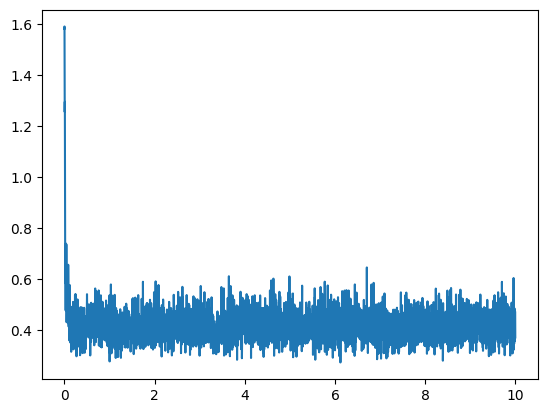

In [275]:
x = np.arange(len(losses)) / len(losses) * epochs
plt.plot(x, losses)

From the model what should be the minimum MSE?
$$E[Y] = E[c \cdot X] = c \cdot E[X]$$
which in our case is 0 * 0.5
and for var
$$\text{Var}(Y) = \text{Var}(c \cdot X) = c^2 \cdot \text{Var}(X)$$

Hence we have
Noise distribution is $\varepsilon\sim\mathcal{N}\p{0, 0.25}$ so the
minimum MSE should be $\mathbb{E}\p{\epsilon^2}=0.25$. \# </answer>

### Learning loop with scheduler

From convex optimization theory the learning rate should be decreasing
toward 0. To have something approaching we use a scheduler that is
updating the learning rate every epoch.

In [291]:
from torch.optim.lr_scheduler import MultiStepLR

# Define a scheduler
model = LinearLeastSquare(p)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[3, 6], gamma=0.2) 

In [279]:
loss_fn = MSELoss()
loss_fn

MSELoss()

In [292]:
# Implement the learning loop with a scheduler
epochs = 10
losses = []
for i in range(epochs):
    for src, tgt in train_loader:
        # forward
        out = model(src)

        # backward
        loss = loss_fn(out, tgt)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        # step
        optimizer.step()
    scheduler.step()

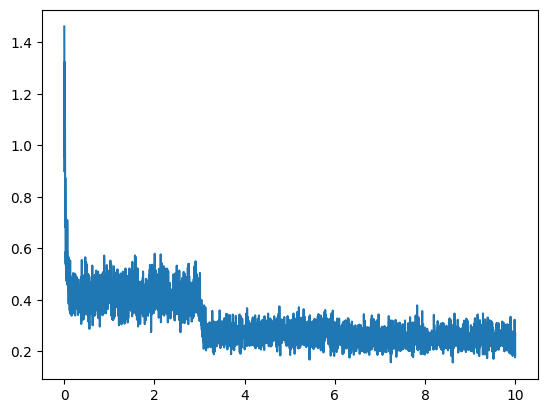

In [295]:
x = np.arange(len(losses)) / len(losses) * epochs
plt.plot(x, losses)
# </answer>

## Multi-layer perceptron

Implement a multi-layer perceptron described by the following function:
$$
f\p{x,\beta}=W_3\sigma\p{W_2\sigma\p{W_1 x}}
$$ where $\sigma\p{x}=\max\p{x, 0}$.

In [299]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MultiLayerPerceptron, self).__init__()
        # Define hyperparameters of neural network and building blocks
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.fc1 = nn.Linear(self.input_size, self.hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(self.hidden_size1, self.hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(self.hidden_size2, self.output_size)
    def forward(self, x):
        # Implement forward pass
        hidden = self.fc1(x)
        relu1 = self.relu1(hidden)
        hidden2 = self.fc2(relu1)
        relu2 = self.relu2(hidden2)
        output = self.fc3(relu2)
        return output 

### Synthetic 2-dimensional spiral dataset

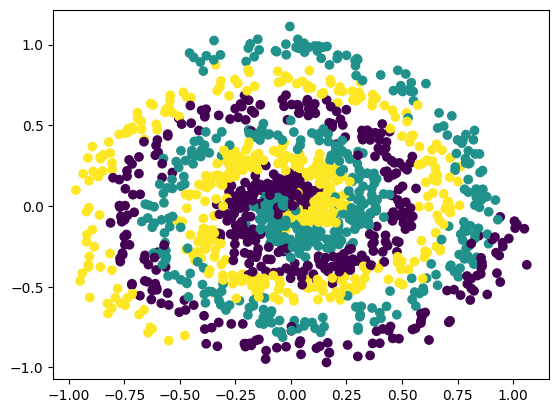

In [300]:
n_classes = 3
n_loops = 2
n_samples = 1500

def spirals(n_classes=3, n_samples=1500, n_loops=2):
    klass = np.random.choice(n_classes, n_samples)
    radius = np.random.rand(n_samples)
    theta = klass * 2 * math.pi / n_classes + radius * 2 * math.pi * n_loops
    radius = radius + 0.05 * np.random.randn(n_samples)
    return np.column_stack((radius * np.cos(theta), radius * np.sin(theta))).astype("float32"), klass

X_, y_ = spirals(n_samples=n_samples, n_classes=n_classes, n_loops=n_loops)
plt.scatter(X_[:, 0], X_[:, 1], c=y_)

### Preparing dataset

In [301]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X = torch.from_numpy(X_)
y = torch.from_numpy(y_)
dataset = TensorDataset(X, y)
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [302]:
X_, y_ = spirals(n_samples=1000, n_classes=n_classes, n_loops=n_loops)
X = torch.from_numpy(X_)
y = torch.from_numpy(y_)
test_set = TensorDataset(X, y)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

### The learning loop

In [303]:
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss

loss_fn = CrossEntropyLoss()
model = MultiLayerPerceptron(2, 20, 20, n_classes)
optimizer = SGD(model.parameters(), lr=0.05)
optimizer = Adam(model.parameters())

In [304]:
import copy

epochs = 1000
losses = []
models = []
for i in range(epochs):
    for src, tgt in train_loader:
        ...

    # Accuracy on the test set
    acc = 0.
    for src, tgt in test_loader:
        prd = model(src).detach().argmax(dim=1)
        acc += sum(prd == tgt).item()

    acc /= len(test_set)
    if i % 20 == 0:
        print(f"Epoch {i}/{epochs}: Test accuracy: {acc}")

    models.append(copy.deepcopy(model))

Epoch 0/1000: Test accuracy: 0.321
Epoch 20/1000: Test accuracy: 0.321
Epoch 40/1000: Test accuracy: 0.321
Epoch 60/1000: Test accuracy: 0.321
Epoch 80/1000: Test accuracy: 0.321
Epoch 100/1000: Test accuracy: 0.321
Epoch 120/1000: Test accuracy: 0.321
Epoch 140/1000: Test accuracy: 0.321
Epoch 160/1000: Test accuracy: 0.321
Epoch 180/1000: Test accuracy: 0.321
Epoch 200/1000: Test accuracy: 0.321
Epoch 220/1000: Test accuracy: 0.321
Epoch 240/1000: Test accuracy: 0.321
Epoch 260/1000: Test accuracy: 0.321
Epoch 280/1000: Test accuracy: 0.321
Epoch 300/1000: Test accuracy: 0.321
Epoch 320/1000: Test accuracy: 0.321
Epoch 340/1000: Test accuracy: 0.321
Epoch 360/1000: Test accuracy: 0.321
Epoch 380/1000: Test accuracy: 0.321
Epoch 400/1000: Test accuracy: 0.321
Epoch 420/1000: Test accuracy: 0.321
Epoch 440/1000: Test accuracy: 0.321
Epoch 460/1000: Test accuracy: 0.321
Epoch 480/1000: Test accuracy: 0.321
Epoch 500/1000: Test accuracy: 0.321
Epoch 520/1000: Test accuracy: 0.321
Epoch 5

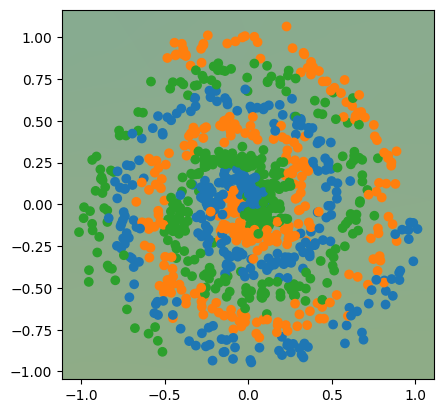

In [305]:
def get_image_data(model, colors, xs, ys):
    """Return color image of size H*W*4."""

    # Generate points in grid
    xx, yy = np.meshgrid(xs, ys)
    points = np.column_stack((xx.ravel(), yy.ravel())).astype("float32")
    points = torch.from_numpy(points)

    # Predict class probability on points
    prd = model(points).detach()
    prd = torch.nn.functional.softmax(prd, dim=1)

    # Build a color image from colors
    colors = torch.from_numpy(colors)
    img = torch.mm(prd, colors).numpy()
    img = img.reshape((ynum, xnum, 4))
    img = np.minimum(img, 1)

    return img

fig, ax = plt.subplots()

# Get n_classes colors in RGBa form
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
import matplotlib as mpl
colors = mpl.colors.to_rgba_array(colors)[:n_classes, :4].astype("float32")

# Draw scatter plot of test set using colors
ax.scatter(X[:, 0], X[:, 1], c=colors[y])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
xnum, ynum = (int(i) for i in fig.dpi * fig.get_size_inches())

# Create discretization
xs = np.linspace(xmin, xmax, xnum)
ys = np.linspace(ymin, ymax, ynum)
img = get_image_data(model, colors, xs, ys)

ax.imshow(img, extent=[xmin, xmax, ymin, ymax], origin="lower", alpha=.7)